# Matplotlib: the Python (default) plotting library

Copyright 2023 Marco A. Lopez-Sanchez.  
Content under [Creative Commons Attribution license CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).

> **Goal**:  
> Learn the basics of the Matplotlib library and use the examples to expand our knowledge of the Python language  
>  
> **What it is?**  
> Matplotlib is the standard data visualization tool in Python. It allows creating static, animated and interactive visualizations. Many other Python visualization tools (e.g. seaborn) are built on top of Matplotlib. See https://matplotlib.org/   
>
> **What it is used for?**  
> Analize, explore, and show relationships between data.
>
> **Useful resources**  
> https://matplotlib.org/ (official website)  
> https://matplotlib.org/stable/index.html (official documentation website)  
> https://matplotlib.org/cheatsheets/ (official matplolib cheatsheets)  
> https://matplotlib.org/stable/gallery/index.html (official matplotlib gallery with example plots)  
> [Basics of Data Visualisation in Python Using Matplotlib](https://thepythoncodingbook.com/basics-of-data-visualisation-in-python-using-matplotlib/) from "The Python Coding Book"  

# Getting started with matplotlib

## Making your first plot

The first thing to do is to import pyplot, which is a submodule of matplotlib that allows creating interactive figures. By Python standarrs, we do it in the following way

In [1]:
import matplotlib.pyplot as plt

Let's create our first plot

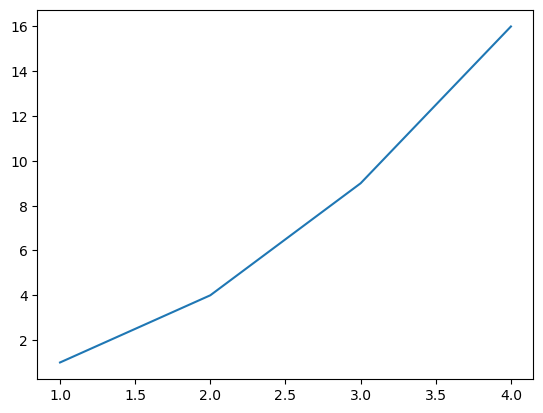

In [2]:
# generate some data
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

# make a simple plot using the state-based interface (normally used for one-liners), see later for details
plt.plot(x, y)

> 🚨 Depending on the IDE you are using, you may have to call the ``plt.show()`` command to display the figures. This is not necessary in Jupyter notebooks, as by default plots are automatically displayed in the document.

## Customising the plot

You can customise the plot by adding the type of marker, its size, labels and titles (almost anything you can think of really). For this, you can add different parameters to the built-in functions of the pyplot submodule (e.g. color, markersize, fontsize, etc.) or add new functions (e.g. ``xlabel``, etc.) as in the example below

Text(0, 0.5, 'here we use Latex: $x^2$')

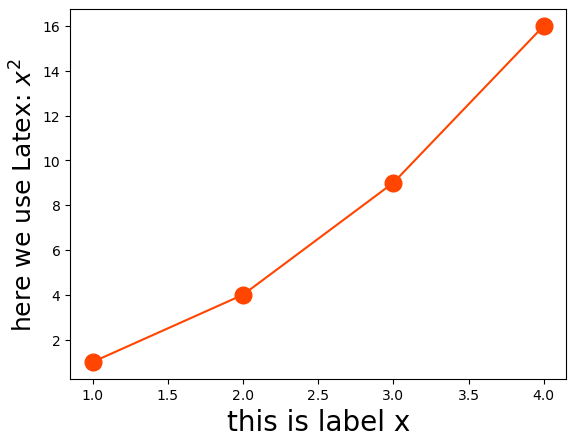

In [3]:
plt.plot(x, y, marker='o', color='orangered', markersize=12)  # here we set the type of marker, its color, and its size using different parameters within the plot() function
plt.xlabel('this is label x', fontsize=20)                    # here we add the label of the axis x calling "xlabel()" and set the font size
plt.ylabel('here we use Latex: $x^2$', fontsize=18)           # here we set the label of the axis y calling "ylabel()" and set the font size, we used LaTeX language using $$

another example creating an histogram

Text(0.5, 0, 'some variable')

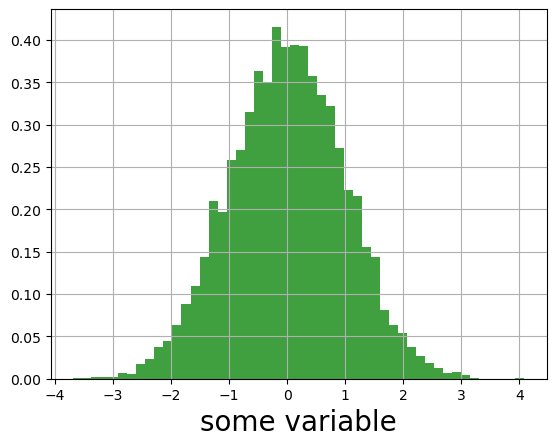

In [4]:
import numpy as np

# generate a normal population of size 10_000
rgn = np.random.default_rng()
normal = rgn.standard_normal(size=10000)

plt.hist(normal, 50, density=True, facecolor='green', alpha=0.75)  # here we use the funtion hist() to plot a histogram of the data
plt.grid(True)                                                     # add a grid
plt.xlabel('some variable', fontsize=20)

You can call ``plot()``  or any other plot type (e.g. ``hist()``, ``scatter()``, ``bar()``...) as many times as you want. **By default**, matplolib will keep adding data to the same figure

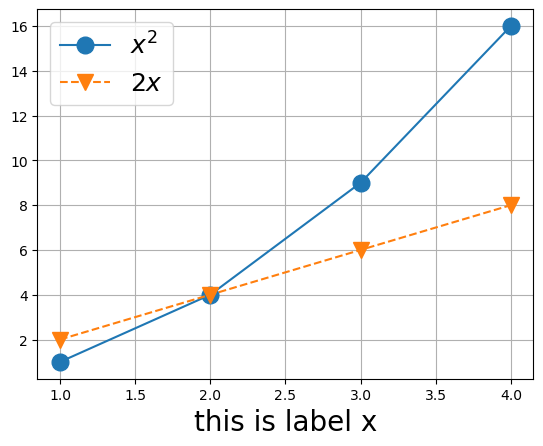

In [5]:
# first call to plot()
plt.plot(x, y, marker='o', markersize=12, label='$x^2$')

# second call to plot()
plt.plot(x, [2, 4, 6, 8], 'v--', markersize=12, label='$2x$')

plt.grid(True)
plt.xlabel('this is label x', fontsize=20)
plt.legend(fontsize=18)  # here we add a legend, note that it uses the labels set within the plot() function!

# The Matplotlib object-oriented interface

Originally Matplotlib was created with an interface that mimic the way MATLAB programming language creates figures. This is called state-based or MATLAB-like interface and was used in all the examples above. Using this way of creating figures, the main syntax difference between MATLAB and Matplotlib is to add the ``plt.`` before stating the methods (e.g. ``plt.scatter()`` instead of ``scatter()``) but with the key difference that by default Matplotlib will keep adding data/elements to the same figure unless you create a new figure and MATLAB does the opposite. This state-based interface is useful (and fine) for generating basic graphics quickly (one-liners) and exploring the data but if you need to have full control and a deeper understanding of the figure you should use the **object-oriented interface**. Matplolib strongly promotes the use of this interface so we are going to go deeper into it.

> 🚨 In the past, most Matplotlib users came from MATLAB and used the state-based interface. Due to this, most examples on the internet (apart from the official matplotlib documentation) are state-based. This trend is fortunately changing. However, when you search for Matplotlib examples on the web you will find examples of both types of interfaces. This has brought a lot of confusion for newcomers, as in the past most tutorials did not explain that these two types of interfaces exist.

All the main parts of a matplolib figure are depicted in the "anatomy of a figure" below.

![anatomy](https://raw.githubusercontent.com/marcoalopez/Python_course/main/notebooks/imgs/sphx_glr_anatomy_002.webp)  
_Figure 1. Anatomy of a Matplotlib plot as depicted in the official Matplotlib documentation_

To avoid confusion, we will clarify the elements that may confuse newcomers the most.

- **Figure** is like the canvas that contains all the elements of the final figure.
- **Axes** is the area where the data will be rendered. You can have from one to many axes as you like per figure.
- **Axis** the x- and y-axis of a 2D plot. Each axe of the figure can have two or three Axis.

The first thing to do to create a figure in the OO interface is to call the function ``plt.subplots()`` as follows

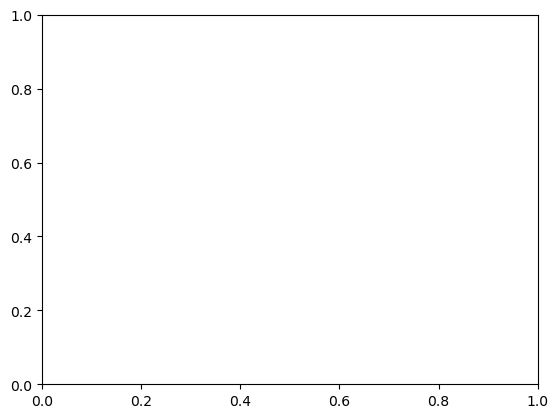

In [6]:
# add a single (one Axe) empty figure showing the graphic primitives
fig, ax = plt.subplots()

Note that the ``plt.subplot()`` returns two different objects, a figure and the axes, in this case one axe.

In [7]:
fig, ax

(<Figure size 640x480 with 1 Axes>, <Axes: >)

Now, let's create a slightly more complex figure with two axes

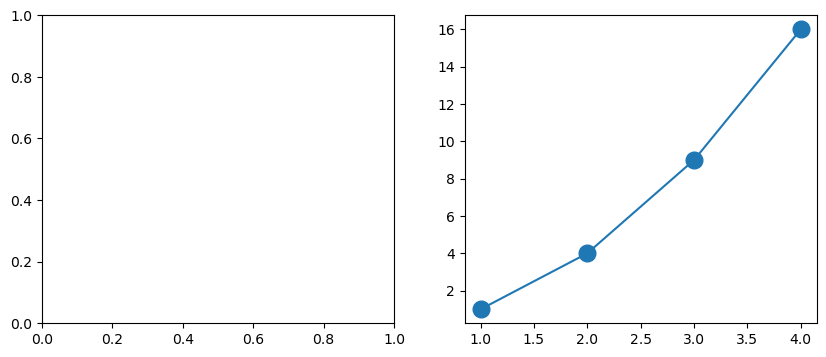

In [8]:
# a two column (2 axes) empty figure (in this example we use a tuple to unpack the axes)
fig, (ax_left, ax_right) = plt.subplots(ncols=2, figsize=(10, 4))

# plot something in the right axe
ax_right.plot(x, y, marker='o', markersize=12)

or even more axes

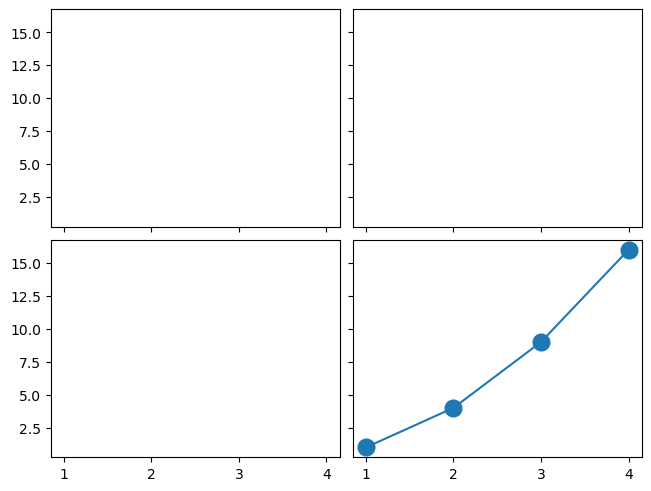

In [9]:
# create an empty figure with two columns and two rows with shared x and y axis
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, constrained_layout=True)

# plot something in the (1, 1) axe, remenber that Python is zero-base indexing
axes[1,1].plot(x, y, marker='o', markersize=12, label='$x^2$')

Let us dwell on some important details by comparing the two figures above. In the first example, the different axes were unpacked using a tuple (e.g. ``(ax_left, ax_right)``), but in the second case all the axes are contained within the object called ``axes``. Let's check

In [10]:
axes

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

Axes contains a list with two sub-lists which in turn contain each of the axes (each sub-list represents one row). To access each of them individually, one can use Python indexing. This is precisely what the example is doing using ``axes[1,1].plot``. Specifically, we are indicating that we want to display the data in the axe that corresponds to the list with index 1 and the element with index 1 of such list (remember that Python indexes start from 0). An alternative would be to unpack the different axes in the following way

```python
((ax1, ax2), (ax3, ax4)) = axes
````

Now the ``axes[0,0]`` would have been reassigned as ``ax1``, ``axes[0,1]`` to ``ax2``, and so on. You can do as you prefer, the advantage of the first approach is that it allows you to loop over the axes, saving you some code lines in specific cases. We'll see some examples of this later.

So far, we have used different parameters within the subplots function to control different elements of the figure. These are the most important ones you should be aware of:

 - ``figsize`` the width and height of the figure in inches. By default (6.4, 4.8).
 - ``dpi``: the resolution of the figure in dots-per-inch. Default is 100.
 - ``ncols, nrows``: number of columns and rows, respectively.
 - ``sharex, sharey``: Share the x and/or y axis. Bool, default is False
 - ``constrained_layout``: automatically adjusts subplots and decorations like legends and colorbars so that they fit in the figure window while still preserving, as best they can, the logical layout requested by the user. Bool, default is False.

 > 👉 To control the resolution of the figure in pixels you must play with the ``figsize`` and ``dpi`` of the figure at the same time.

 For complex layouts, matplotlib offers several options but one of the simplest and, sadly, underused is the ``plt.subplot_mosaic()`` function that work as follows

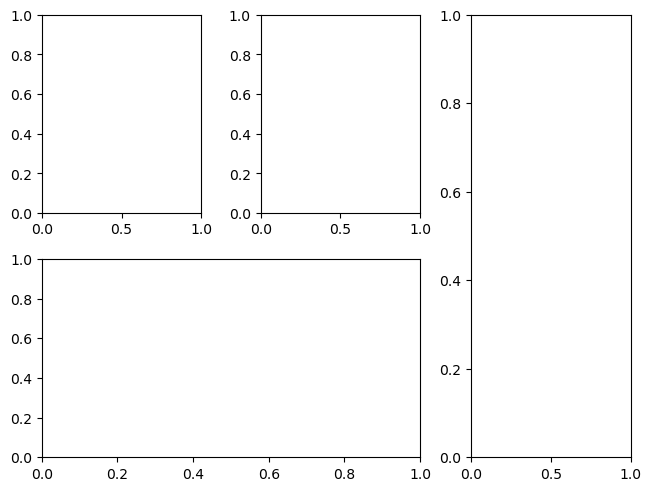

In [11]:
mosaic ="""ABD
           CCD"""

fig, axs = plt.subplot_mosaic(mosaic, constrained_layout=True)

more examples:  
https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html#sphx-glr-tutorials-intermediate-arranging-axes-py  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot_mosaic.html

---

Now, let customise a plot using the OO interface

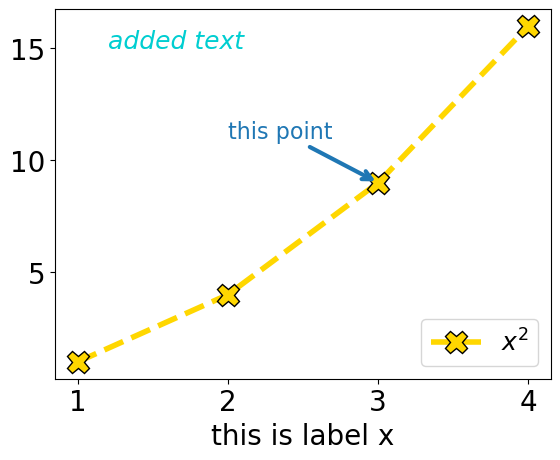

In [12]:
fig, ax = plt.subplots()

ax.plot(x, y, color='gold', marker='X', markersize=16, markeredgecolor='black', linestyle='dashed', linewidth=4, label='$x^2$')

# add the x axis labels
ax.set_xlabel('this is label x', fontsize=20)

# add text and annotation to axe
ax.text(x=1.2, y=15, s='added text', fontsize=18, color='darkturquoise', fontstyle='italic')
ax.annotate('this point', xy=(3, 9), xytext=(2, 11), fontsize=16, color='C0',
            arrowprops=dict(arrowstyle='->', color='C0', linewidth=3))

# add legend
ax.legend(loc='lower right', fontsize=18)

# modify the size of the tick labels
ax.tick_params(axis='both', labelsize=20)

As you can see, it is a matter of adding new elements to specific ``axes`` and the options available to tweak the figure are quite extensive.

By default, matplolib provides more than 20 types of two-dimensional plots plus other types of projections such as polar and three-dimensional, some of them summarised below.

![mpl_cheatsheet](https://raw.githubusercontent.com/marcoalopez/Python_course/c13aa4d2c6ff86842e44baa951fe7f6722446635/notebooks/imgs/mpl_cheatsheet.png)  
_Summary of some of the plot types included in the matplolib library as presented in the matplolib cheatsheet here https://matplotlib.org/cheatsheets/. You may also want to check the official matplotlib gallery https://matplotlib.org/stable/gallery/index.html_

We will be using different plot types throughout the different examples contained in the walkthrought notebooks of this course. Matplotlib, however, will allow you any kind of plot you can think of even if it is not included in the default figure types. This is of course outside the scope of this course, but you will find more information at the end of this notebook in the "Going further" section.

## Save your figure

So far, we have never used the object ``fig``. This is normal, as most of the time you will be dealing with axes. An example where you will use this _figure object_ is when you want to save a figure on your hard disk. This is done using the ``savefig()`` method as follows

In [13]:
fig.savefig('figure01.png', dpi=96, bbox_inches='tight')

In this case, we specify the name of the file ``figure01`` and the format ``.png`` using a string, the resolution in dpi, and a parameter to ensure that no element of the figure is cut. By default, the file will be saved in the same folder where you have the Jupyter notebook, you can specify full or relative addresses without any problem. For example, using ``'figures/figure01.png'`` will create the folder _figures_ and then store de _figure01_ there. As any other functions, the ``savefig()`` function allows you to control a number of features through different parameters, you can see the options here https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

# Matplotlib styles

Other than the default style, Matplotlib has different available style sheets to change the default appearance of your figures. You have a list of style sheets here https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

To change the default look of your figures you can do as follows

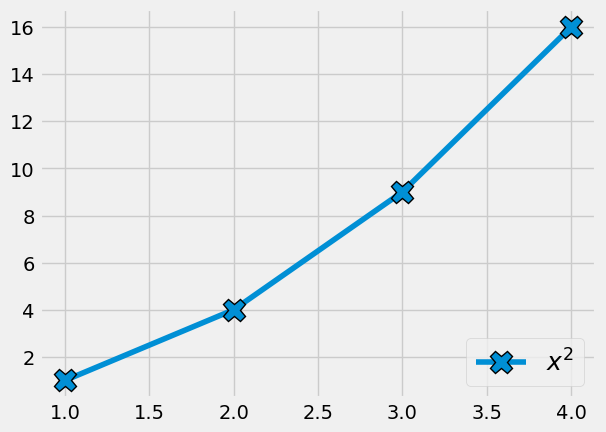

In [14]:
import matplotlib as mpl
mpl.style.use('fivethirtyeight')  # I'm going to use the 'fivethirtyeight' style

fig, ax = plt.subplots()

ax.plot(x, y, marker='X', markersize=16, markeredgecolor='black', label='$x^2$')
ax.legend(loc='lower right', fontsize=18)

Matplotlib allows you to create your own styling templates but that goes beyond this tutorial.

# More examples

Now that you have an idea of how to make basic figures with Matplotlib, let's focus on using it as a vehicle to learn about programming and data science using Python and improve our skills with this library in the process.

## Example 1

TODO


## Example 2

TODO

# Going further

You can use matplolib for just about anything you can think of. A good source of inspiration is the book [Scientific Visualization: Python + Matplolib](https://github.com/rougier/scientific-visualization-book) by Nicolas P. Rougier where you can find impressive examples of what you can do (just take a look at the picture gallery!).

Some scientific-oriented Python plotting libraries that depends on matplotlib are:  
- [Seaborn](https://seaborn.pydata.org/): statistical graphics build on-top of matplotlib.  
- [Cartopy](https://scitools.org.uk/cartopy/docs/latest/index.html): Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.  
- [yt](https://yt-project.org/): analyzing and visualizing volumetric data.  
- [plotnine](https://plotnine.readthedocs.io/en/stable/): implementation of a grammar of graphics in Python.


Other plotting libraries not based on matplolib:  
- [Mayavi](https://docs.enthought.com/mayavi/mayavi/#): general purpose 3-D scientific data visualization.  
- [Plotly](https://plotly.com/python/): visualization tool that works with different programming languages including Python  
- [Vega-Altair](https://altair-viz.github.io/):  declarative statistical visualization library for Python, based on Vega and Vega-Lite  

In [15]:
import sys
from datetime import date    
today = date.today().isoformat()

print(f'Notebook tested in {today} using:')
print('Python', sys.version)
print('Matplotlib', mpl.__version__)

Notebook tested in 2023-05-04 using:
Python 3.10.11 | packaged by Anaconda, Inc. | (main, Apr 20 2023, 18:56:50) [MSC v.1916 64 bit (AMD64)]
Matplotlib 3.7.1
